In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import json
# 
# # Read the file as a string
# with open('results2.json', 'r') as f:
#     data_str = f.read()
# 
# # Replace single quotes with double quotes
# data_str = data_str.replace("'", '"')
# 
# # Load the string as a JSON object
# data = json.loads(data_str)
# 
# # Now you can proceed with your data processing
# for i in range(len(data)):
#     # Convert each key to a string
#     data[i] = {str(key): value for key, value in data[i].items()}
# 
# # Write the modified data back to the JSON file
# with open('results2_edit.json', 'w') as f:
#     json.dump(data, f)

In [12]:
#df2 = pd.read_json('results2_edit.json')
df1 = pd.read_json('results_4.json')
df1.head()

,patch_name,patch_class,patch_size,acc_undef,acc_def
0,class_0_patch_0_size_10_3_ep_3.pt,0,103,0.230,0.250
1,class_0_patch_0_size_20_3_ep_3.pt,0,203,0.472,0.427
2,class_0_patch_0_size_30_3_ep_3.pt,0,303,0.589,0.549
3,class_0_patch_0_size_45_3_ep_3.pt,0,453,0.700,0.707
4,class_0_patch_0_size_90_1_ep_3.pt,0,901,0.598,0.327


In [13]:
labels = ['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking']

In [14]:
# off the whole dataset, get the average difference between acc_undef and acc_def
df1['acc_diff'] = df1['acc_def'] - df1['acc_undef']
mean_diff = df1['acc_diff'].mean()
print(f'The average difference between acc_undef and acc_def is {mean_diff}')

The average difference between acc_undef and acc_def is 0.1251833333333333


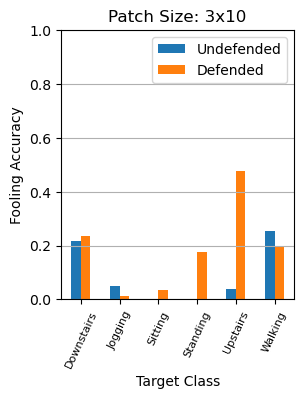

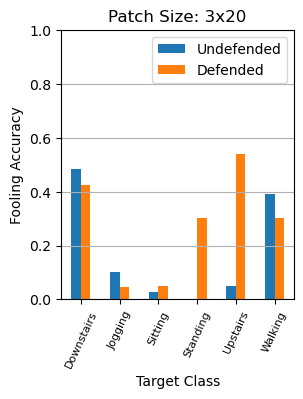

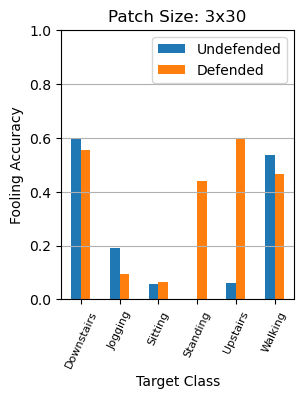

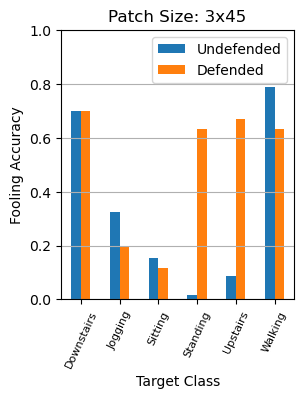

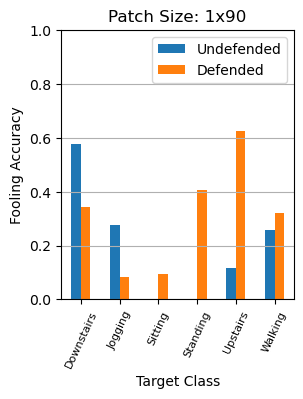

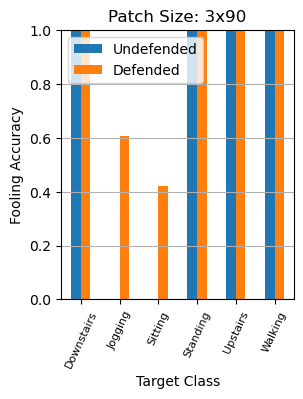

In [15]:
# Get unique 'patch_size' values
patch_sizes = df1['patch_size'].unique()
# For each unique 'patch_size'
for patch_size in patch_sizes:
    #initialize a new figure, with size 8x8
    fig, ax = plt.subplots(figsize=(3,3.5))

    # Filter the DataFrame
    df_filtered = df1[df1['patch_size'] == patch_size]
    # Group by 'patch_class', and calculate the mean of 'acc_undef' and 'acc_def'
    #df_grouped = df_filtered.groupby('patch_class')['acc_undef', 'acc_def'].mean().reset_index()
    df_grouped = df_filtered.groupby('patch_class')[['acc_undef', 'acc_def']].mean().reset_index()
    

    patch_rows = str(patch_size)[-1]
    patch_cols = str(patch_size)[:-1]
    patch_size = f'{patch_rows}x{patch_cols}'

    #rename acc_undef and acc_def to Undefended and Defended
    df_grouped = df_grouped.rename(columns={'acc_undef': 'Undefended', 'acc_def': 'Defended'})
    df_grouped.plot(x='patch_class', y=['Undefended', 'Defended'], kind='bar', title=f'Patch Size: {patch_size}', ax=ax)
    plt.xlabel('Target Class')
    plt.ylabel('Fooling Accuracy')
    plt.ylim(0, 1)
    plt.grid(axis='y')
    ax.set_xticklabels(labels, rotation=65, fontsize=8)
    #save the figure
    plt.savefig(f'images/Results 4/patch_size_{patch_size}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [28]:
df1 = pd.read_json('results_4.json') #Contains the correct defended accuracy
df1 = df1.drop(columns=['acc_undef'])
df2 = pd.read_json('results_3.json') #Contains the correct undefended accuracy
df2_1 = pd.read_json('results2_edit.json') 
df2 = df2.append(df2_1, ignore_index=True)
df2 = df2.drop(columns=['acc_def'])

#print unique patch sizes
print(df2['patch_size'].unique())

df = pd.merge(df1, df2, on=['patch_size', 'patch_class', 'patch_name'])
print(df.head())

[453 901 903 103 203 303]
                          patch_name  patch_class  patch_size  acc_def  \
0  class_0_patch_0_size_10_3_ep_3.pt            0         103    0.250   
1  class_0_patch_0_size_20_3_ep_3.pt            0         203    0.427   
2  class_0_patch_0_size_30_3_ep_3.pt            0         303    0.549   
3  class_0_patch_0_size_45_3_ep_3.pt            0         453    0.707   
4  class_0_patch_0_size_90_1_ep_3.pt            0         901    0.327   

   acc_undef  
0      0.195  
1      0.483  
2      0.672  
3      0.845  
4      0.737  


C:\Users\gijsd\AppData\Local\Temp\ipykernel_10780\138377300.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df2_1, ignore_index=True)


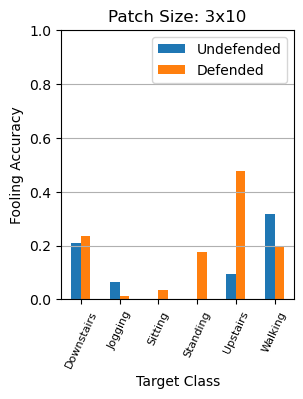

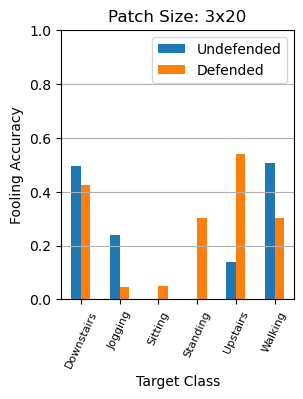

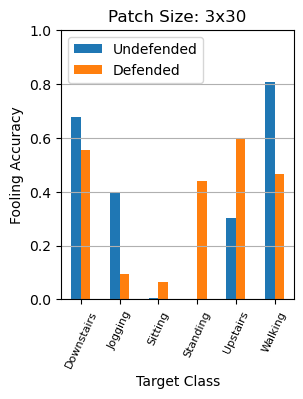

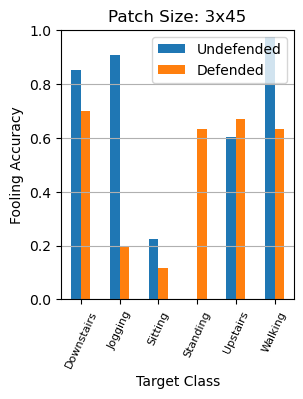

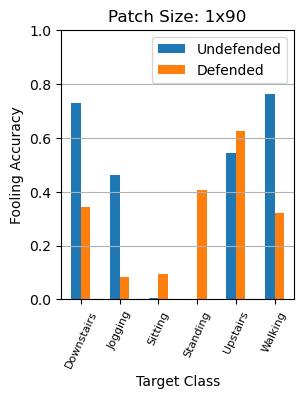

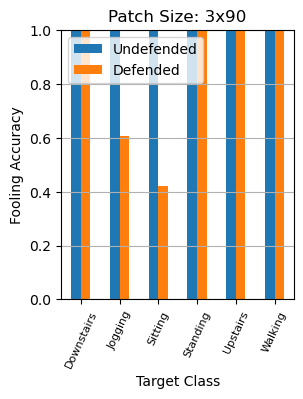

In [29]:
df1 =df

# Get unique 'patch_size' values
patch_sizes = df1['patch_size'].unique()
# For each unique 'patch_size'
for patch_size in patch_sizes:
    #initialize a new figure, with size 8x8
    fig, ax = plt.subplots(figsize=(3,3.5))

    # Filter the DataFrame
    df_filtered = df1[df1['patch_size'] == patch_size]
    # Group by 'patch_class', and calculate the mean of 'acc_undef' and 'acc_def'
    #df_grouped = df_filtered.groupby('patch_class')['acc_undef', 'acc_def'].mean().reset_index()
    df_grouped = df_filtered.groupby('patch_class')[['acc_undef', 'acc_def']].mean().reset_index()


    patch_rows = str(patch_size)[-1]
    patch_cols = str(patch_size)[:-1]
    patch_size = f'{patch_rows}x{patch_cols}'

    #rename acc_undef and acc_def to Undefended and Defended
    df_grouped = df_grouped.rename(columns={'acc_undef': 'Undefended', 'acc_def': 'Defended'})
    df_grouped.plot(x='patch_class', y=['Undefended', 'Defended'], kind='bar', title=f'Patch Size: {patch_size}', ax=ax)
    plt.xlabel('Target Class')
    plt.ylabel('Fooling Accuracy')
    plt.ylim(0, 1)
    plt.grid(axis='y')
    ax.set_xticklabels(labels, rotation=65, fontsize=8)
    #save the figure
    plt.savefig(f'images/Results combined/patch_size_{patch_size}.png', dpi=300, bbox_inches='tight')
    plt.show()